# Machine Learning Basics
## with sklearn

In [78]:
import pip
!pip install scikit-learn

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

## Machine Learning
A learning problem considers a data sample and then tries to predict properties of previously unknown data.

The two main categories of learning problems are:
- **Supervised learning**: the data has an additional attribute ("label") that we want to predict $\rightarrow$ classification or regression
- **Unsupervised learning**: the data has no target value, we want to identify groups of similar samples $\rightarrow$ clustering
- **Reinforcement learning**: no data available, by interacting with an environment and correspondig reactions a system is trained

![Data Science Lifecycle](https://ajgoldsteindotcom.files.wordpress.com/2017/11/ds-deconstructed.jpg?w=740)

## A Sample ML Project

![Titanic Image](http://oliviak.blob.core.windows.net/blog/ML%20series/Titanic%20Sinking.jpg)

## Data Dictionary
| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |  fractional if less than 1                     |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |  definition of family on board                 |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |


For more information, please be refered to the dataset description on [kaggle.com](https://www.kaggle.com/c/titanic/data).


### 01. Frame the Problem
We are given information about the passengers of the Titanic (e.g. gender, age, ticket category) and want to predict who survived the tragedy.

### 02. Load Data

In [80]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 03. Process the Data
We need to understand what the columns mean and probably clean the data.

#### Is the PassengerID consecutive?

In [81]:
df.tail() # ID and pandas index agree...

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Do we know the survival status for each passenger?

In [82]:
# isna() returns a boolean value -> sum > 0 would mean we have NaNs
df['Survived'].isna().sum()

0

#### How many passenger classes are there?

In [83]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### Do we know the name, gender and age of each passenger?

Check if name column contains NaNs.

In [84]:
# YOUR CODE HERE
df["Name"].isna().sum()

0

#### How to handle NaN values?
- remove row
- remove feature (=column)
- replace
  - mean
  - median
  - zero (min)
  - max

In [85]:
# replace NaNs
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [86]:
df.loc[df['Age'].isna(), 'Age'] = df['Age'].mean()
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

#### What is the age distribution of the passengers?

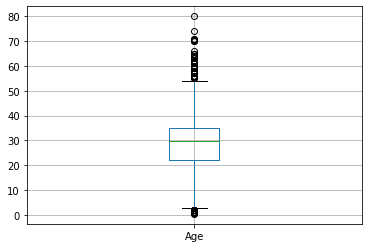

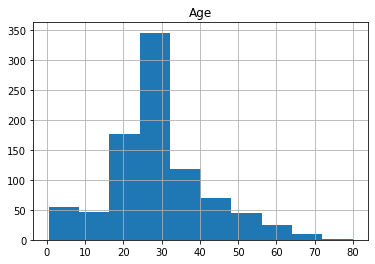

In [87]:
import matplotlib.pyplot as plt
# use pandas plots for simplicity
df.boxplot(column='Age')
df.hist(column='Age')
plt.show()

#### How many passengers had siblings/spouses on board the Titanic?

In [88]:
# SibSp gives the number of siblings/spouses
df['SibSp'].sum()

466

In [89]:
df['SibSp'].astype(bool).sum()

283

#### How many passengers had parents/children on board the Titanic?

In [90]:
# Parch gives the number of parents/children
df['Parch'].astype(bool).sum()

213

#### How much did the passengers pay for their ticket on average?

In [91]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [92]:
df['Fare'].mean()

32.2042079685746

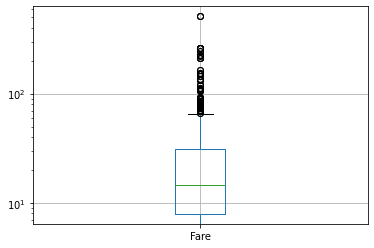

In [93]:
df.boxplot(column='Fare')
plt.yscale('log')
plt.show()

#### Where did the passengers embark?

In [94]:
df['Embarked'].value_counts()
# S = Southampton
# C = Cherbourg
# Q = Queenstown

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### Which features (=columns) are categorical, numerical etc.?

In [95]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### 04. Exploratory Data Analysis
What is the survival rate of men and women?

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

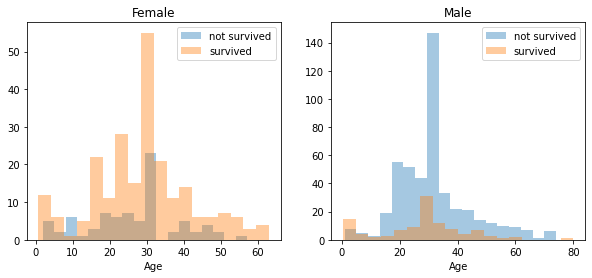

In [96]:
import seaborn as sns
# subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

women = df[df['Sex'] == 'female']
men = df[df['Sex'] == 'male']

# plot women
ax = sns.distplot(women[women['Survived']==0].Age, bins=18, label='not survived', ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==1].Age, bins=18, label='survived', ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

# plot men
ax = sns.distplot(men[men['Survived']==0].Age, bins=18, label='not survived', ax=axes[1], kde=False)
ax = sns.distplot(men[men['Survived']==1].Age, bins=18, label='survived', ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male')
plt.show()

#### Survival Rate by Ticket Price

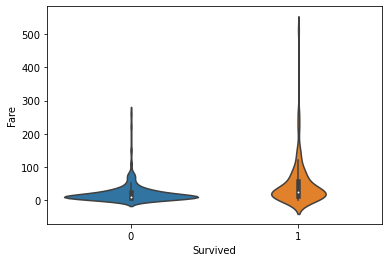

In [97]:
ax = sns.violinplot(x="Survived", y="Fare", data=df)
plt.show()

### 05. Build a Model
Given the training data for the binary classification problem "survival", we want to fit an estimator to be able to predict the class (0=not suvived, 1=survived) of previously unseen data (=test data).

In scikit-learn (sklearn), an estimator for classification is a Python object that implements the methods ``fit(X, y)`` and ``predict(T)``.

An example of an estimator is the ``DicisionTreeClassifier``, that learns simple dicision rules to classify the data. The estimator’s constructor takes as arguments the model’s parameters.

In [98]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

### Training set and testing set

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the **training set**, on which we learn some properties. We call the other set the **testing set**, on which we test the learned properties.

In [99]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8)
df_train.shape

(712, 12)

In [100]:
df_test.shape

(179, 12)

**Let's get on training! Wait..**

In [101]:
#clf.fit(df_train[['Sex', 'Pclass']], df_train['Survived'])  

**We need numeric features!**

In [102]:
 # convert to categorical object and use codes instead of strings
df_train["Gender"] = df_train["Sex"].astype('category').cat.codes
df_test["Gender"] = df_test["Sex"].astype('category').cat.codes
df_train.head()

<ipython-input-102-44cd81d7bc37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Gender"] = df_train["Sex"].astype('category').cat.codes
<ipython-input-102-44cd81d7bc37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Gender"] = df_test["Sex"].astype('category').cat.codes


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C,0
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S,0
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C,1


In [103]:
clf.fit(X=df_train[['Gender', 'Pclass']], y=df_train['Survived'])  

DecisionTreeClassifier(random_state=0)

### Predict on Test Data

In [104]:
from sklearn import tree
y_pred = clf.predict(X=df_test[['Gender', 'Pclass']])
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

#### Evaluation
Accuracy is a very simple measure to evalute the performance of the classifier on the test data. It gives you the number of correctly classified samples.

In [105]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(df_test['Survived'], y_pred)
print(f'The accuracy is {acc*100:.2f}%.')

The accuracy is 74.86%.


#### Evaluation
The decision tree classifier is quite special, as we can also visualize, literally, the decisions it makes:

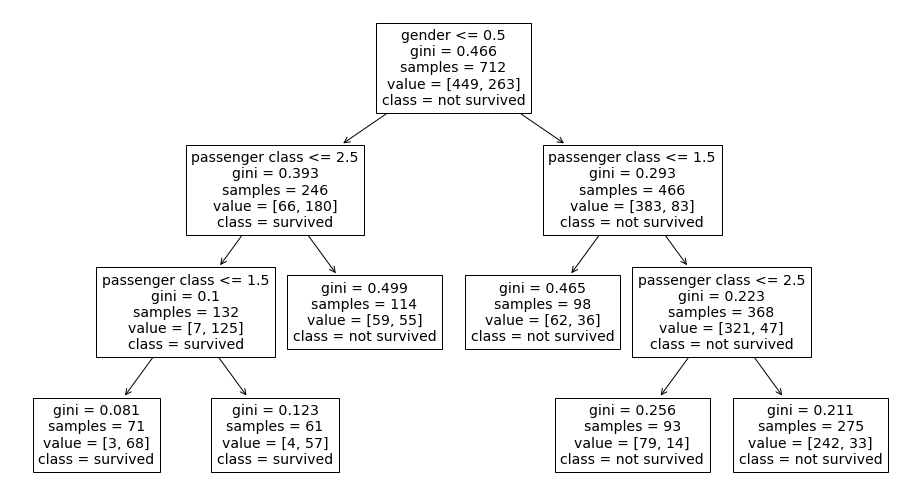

In [106]:
from sklearn import tree
plt.figure(figsize=(16,9)) # needed, that we can see the figure properly
tree.plot_tree(clf, feature_names=['gender', 'passenger class'], class_names=['not survived', 'survived'])
plt.show()

#### Confusion plot
A more in-depth analysis is possible with a so called confusion matrix:

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_test['Survived'], y_pred)
cm

array([[98,  2],
       [43, 36]])

### 06. Visualize the Results
At least, plot the confusion matrix so that it is more interpretable.

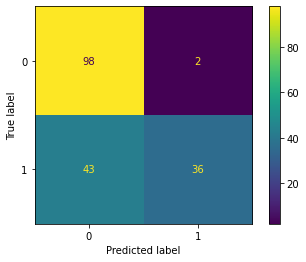

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Confusion PLot = information of predicted lale to true lable
left upper and bottom right is what we want. Means our data mobel works
Other corners are false negativ

## Wrap-up Exercises
1. Draw a plot showing the number of men and women who survived and did not survive (bar plot) on the test data only.

In [109]:
# YOUR CODE HERE
#raise NotImplementedError()

2. Create a simple "classifier": Compute the accuracy score if all women would have been predicted as having survived, and men as not. $\rightarrow$ You can use the column "Gender" as ``y_pred``, directly.

In [110]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8)
df_train.shape
df_train["Gender"] = df_train["Sex"].astype('category').cat.codes
df_test["Gender"] = df_test["Sex"].astype('category').cat.codes
df_train.head()
clf.fit(X=df_train[['Gender', 'Age']], y=df_train['Survived']) 
from sklearn import tree
y_pred = clf.predict(X=df_test[['Gender', 'Age']])
y_pred[:10]
from sklearn.metrics import accuracy_score
acc = accuracy_score(df_test['Survived'], y_pred)
print(f'The accuracy is {acc*100:.2f}%.')

The accuracy is 78.21%.


<ipython-input-110-362e9d5e3c8f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Gender"] = df_train["Sex"].astype('category').cat.codes
<ipython-input-110-362e9d5e3c8f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Gender"] = df_test["Sex"].astype('category').cat.codes


In [111]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8)
df_train.shape
df_train["Gender"] = df_train["Sex"].astype('category').cat.codes
df_test["Gender"] = df_test["Sex"].astype('category').cat.codes
df_train.head()
clf.fit(X=df_train[['Gender', 'Fare']], y=df_train['Survived']) 
from sklearn import tree
y_pred = clf.predict(X=df_test[['Gender', 'Fare']])
y_pred[:10]
from sklearn.metrics import accuracy_score
acc = accuracy_score(df_test['Survived'], y_pred)
print(f'The accuracy is {acc*100:.2f}%.')

The accuracy is 84.36%.


<ipython-input-111-7be18d7afbd2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Gender"] = df_train["Sex"].astype('category').cat.codes
<ipython-input-111-7be18d7afbd2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Gender"] = df_test["Sex"].astype('category').cat.codes


3. Add more columns (e.g. ``Age``) to train the decision tree classifier and check if the performance improves. What happens to the graphical output of the tree?

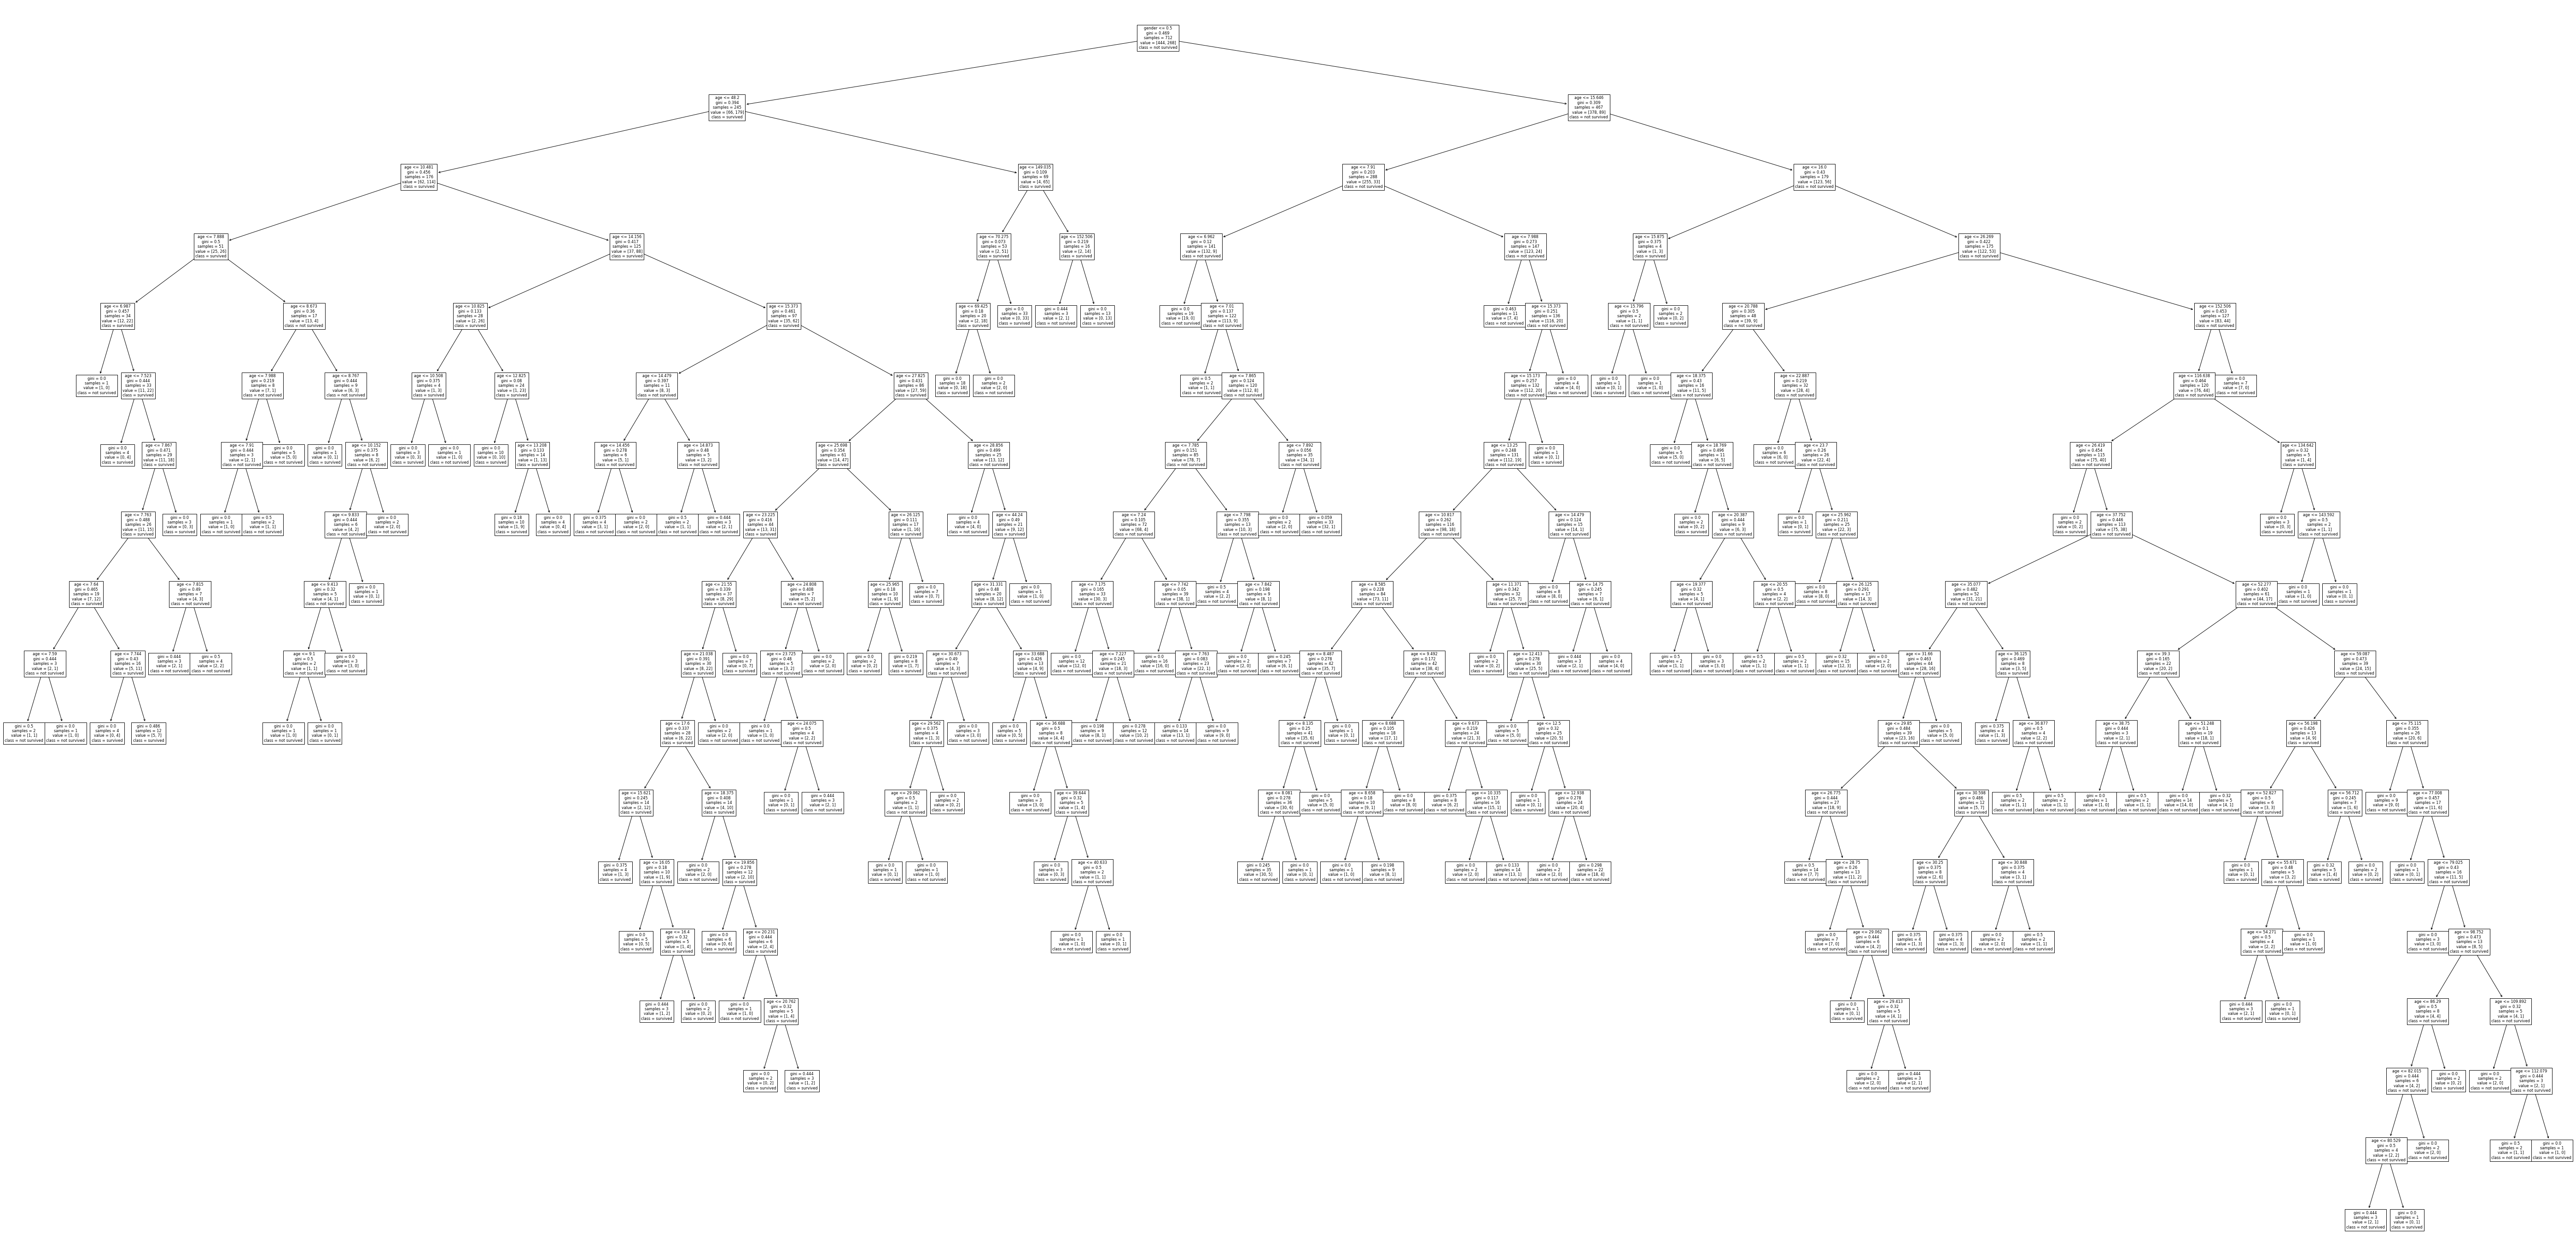

In [112]:
# YOUR CODE HERE
from sklearn import tree
plt.figure(figsize=(100,50)) # needed, that we can see the figure properly
tree.plot_tree(clf, feature_names=['gender', 'age'], class_names=['not survived', 'survived'])
plt.savefig("./tree")
plt.show()

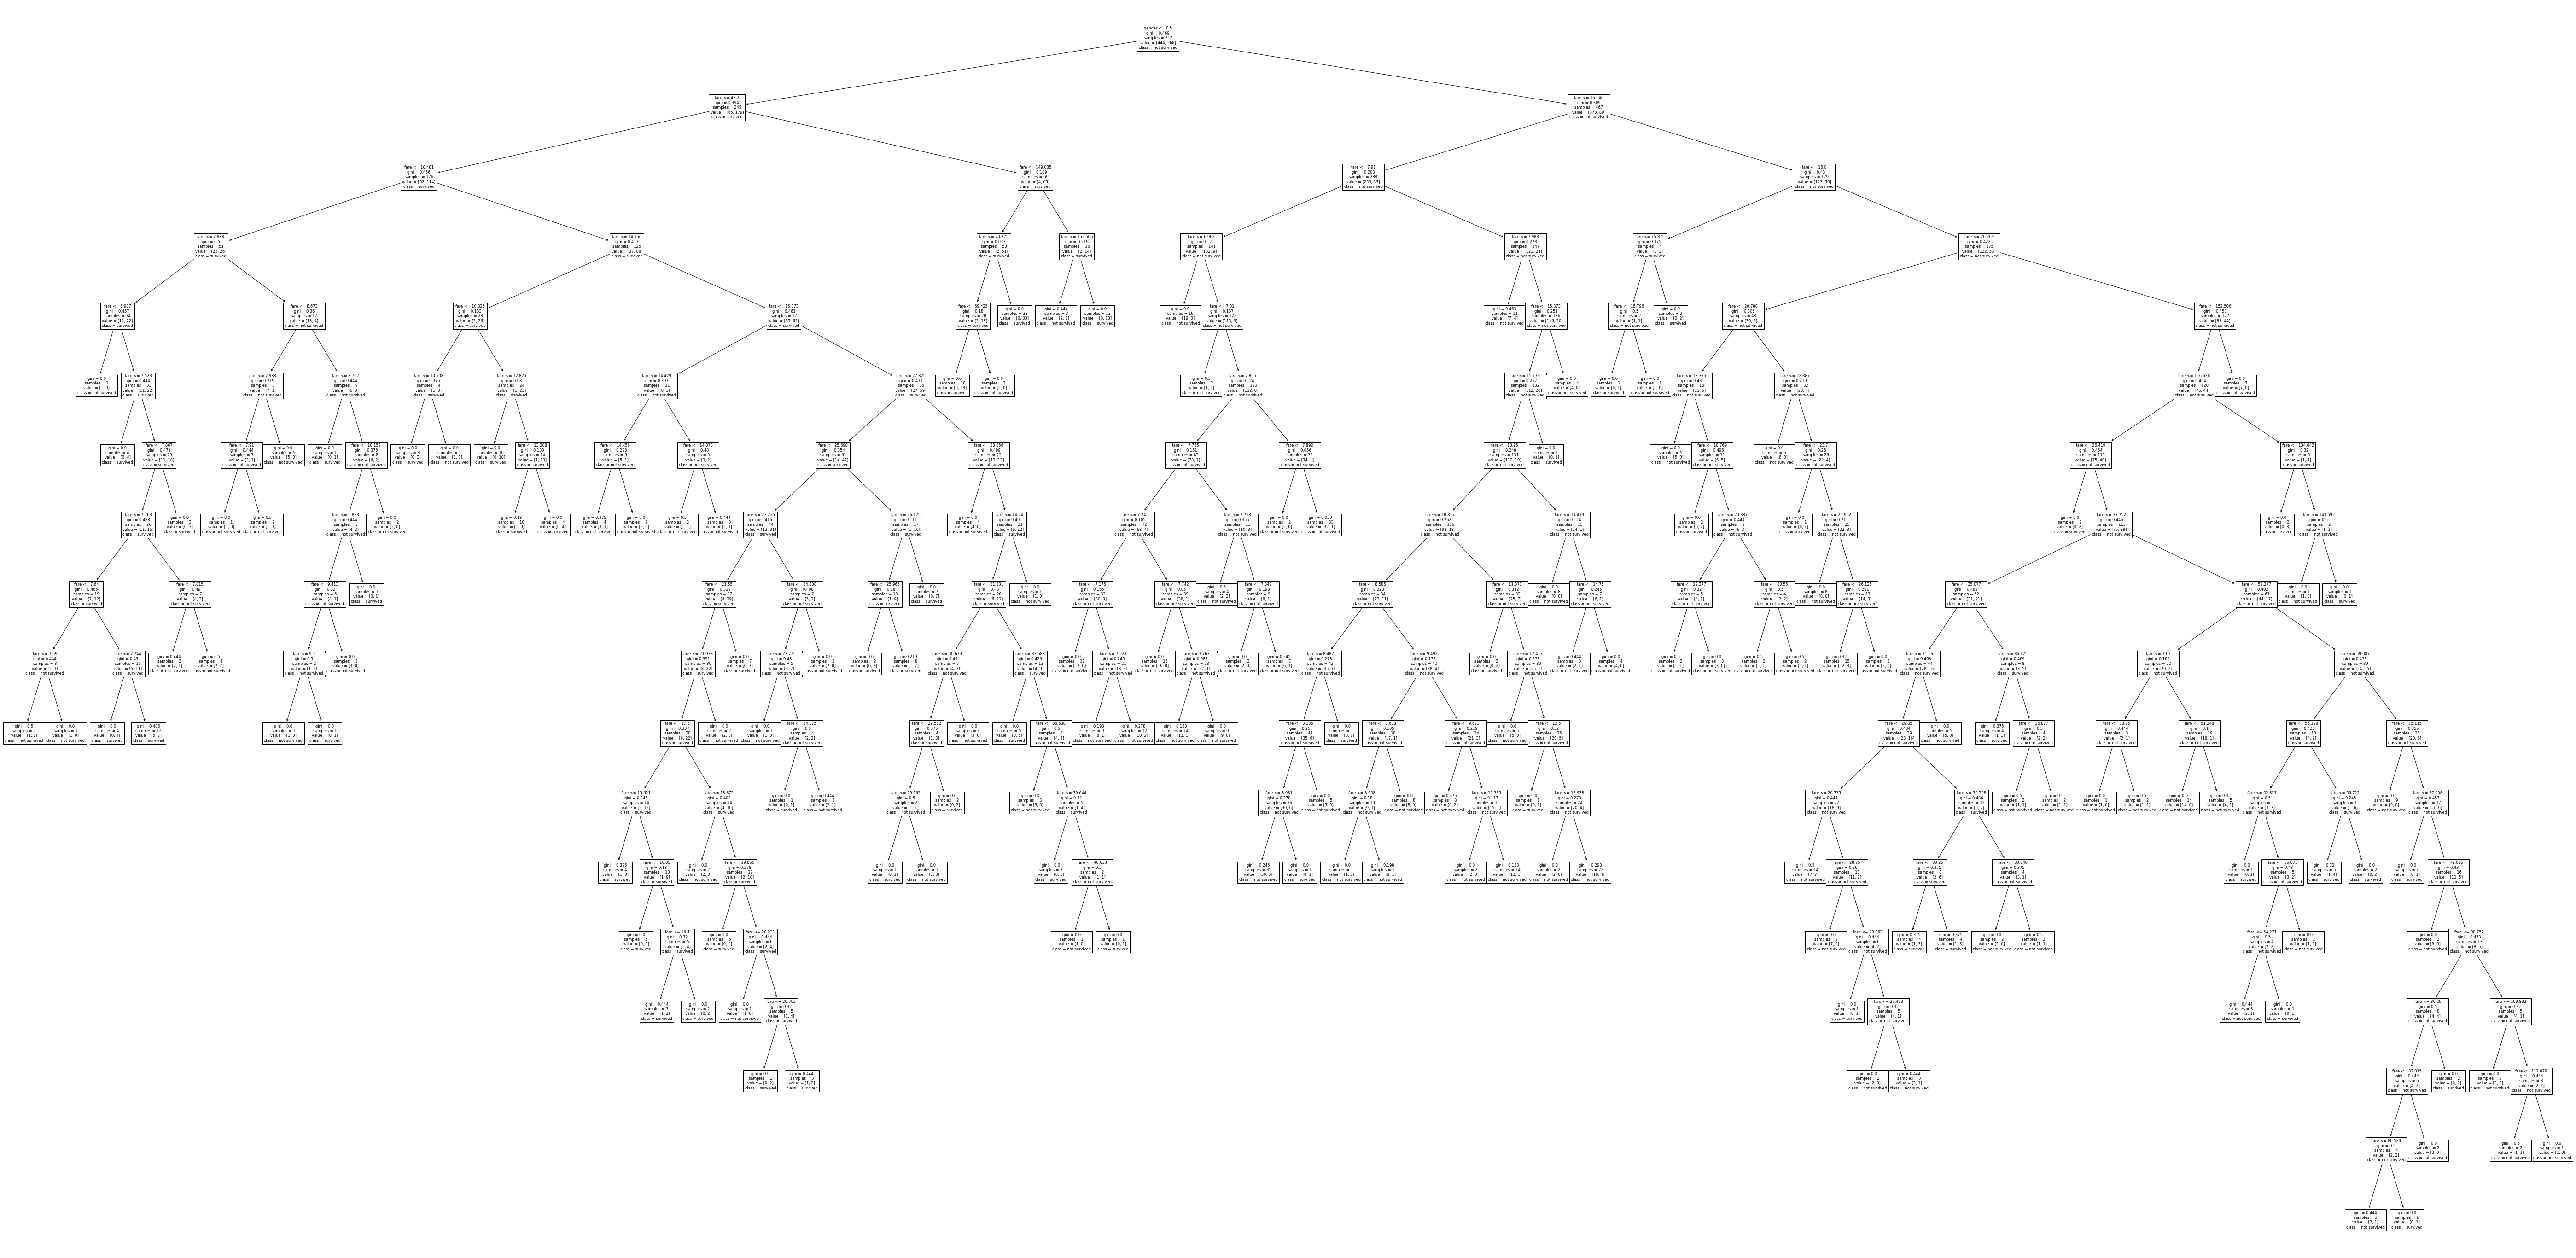

In [113]:
from sklearn import tree
plt.figure(figsize=(100,50)) # needed, that we can see the figure properly
tree.plot_tree(clf, feature_names=['gender', 'fare'], class_names=['not survived', 'survived'])
plt.savefig("./treeFair")
plt.show()

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(random_state=0)
df_train, df_test = train_test_split(df, train_size=0.8)
df_train.shape
df_train["Gender"] = df_train["Sex"].astype('category').cat.codes
df_test["Gender"] = df_test["Sex"].astype('category').cat.codes
df_train.head()
clf.fit(X=df_train[['Gender', 'SibSp']], y=df_train['Survived']) 
y_pred = clf.predict(X=df_test[['Gender', 'SibSp']])
y_pred[:10]
acc = accuracy_score(df_test['Survived'], y_pred)
print(f'The accuracy is {acc*100:.2f}%.')

The accuracy is 79.89%.


<ipython-input-116-fd6e33588d73>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Gender"] = df_train["Sex"].astype('category').cat.codes
<ipython-input-116-fd6e33588d73>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Gender"] = df_test["Sex"].astype('category').cat.codes


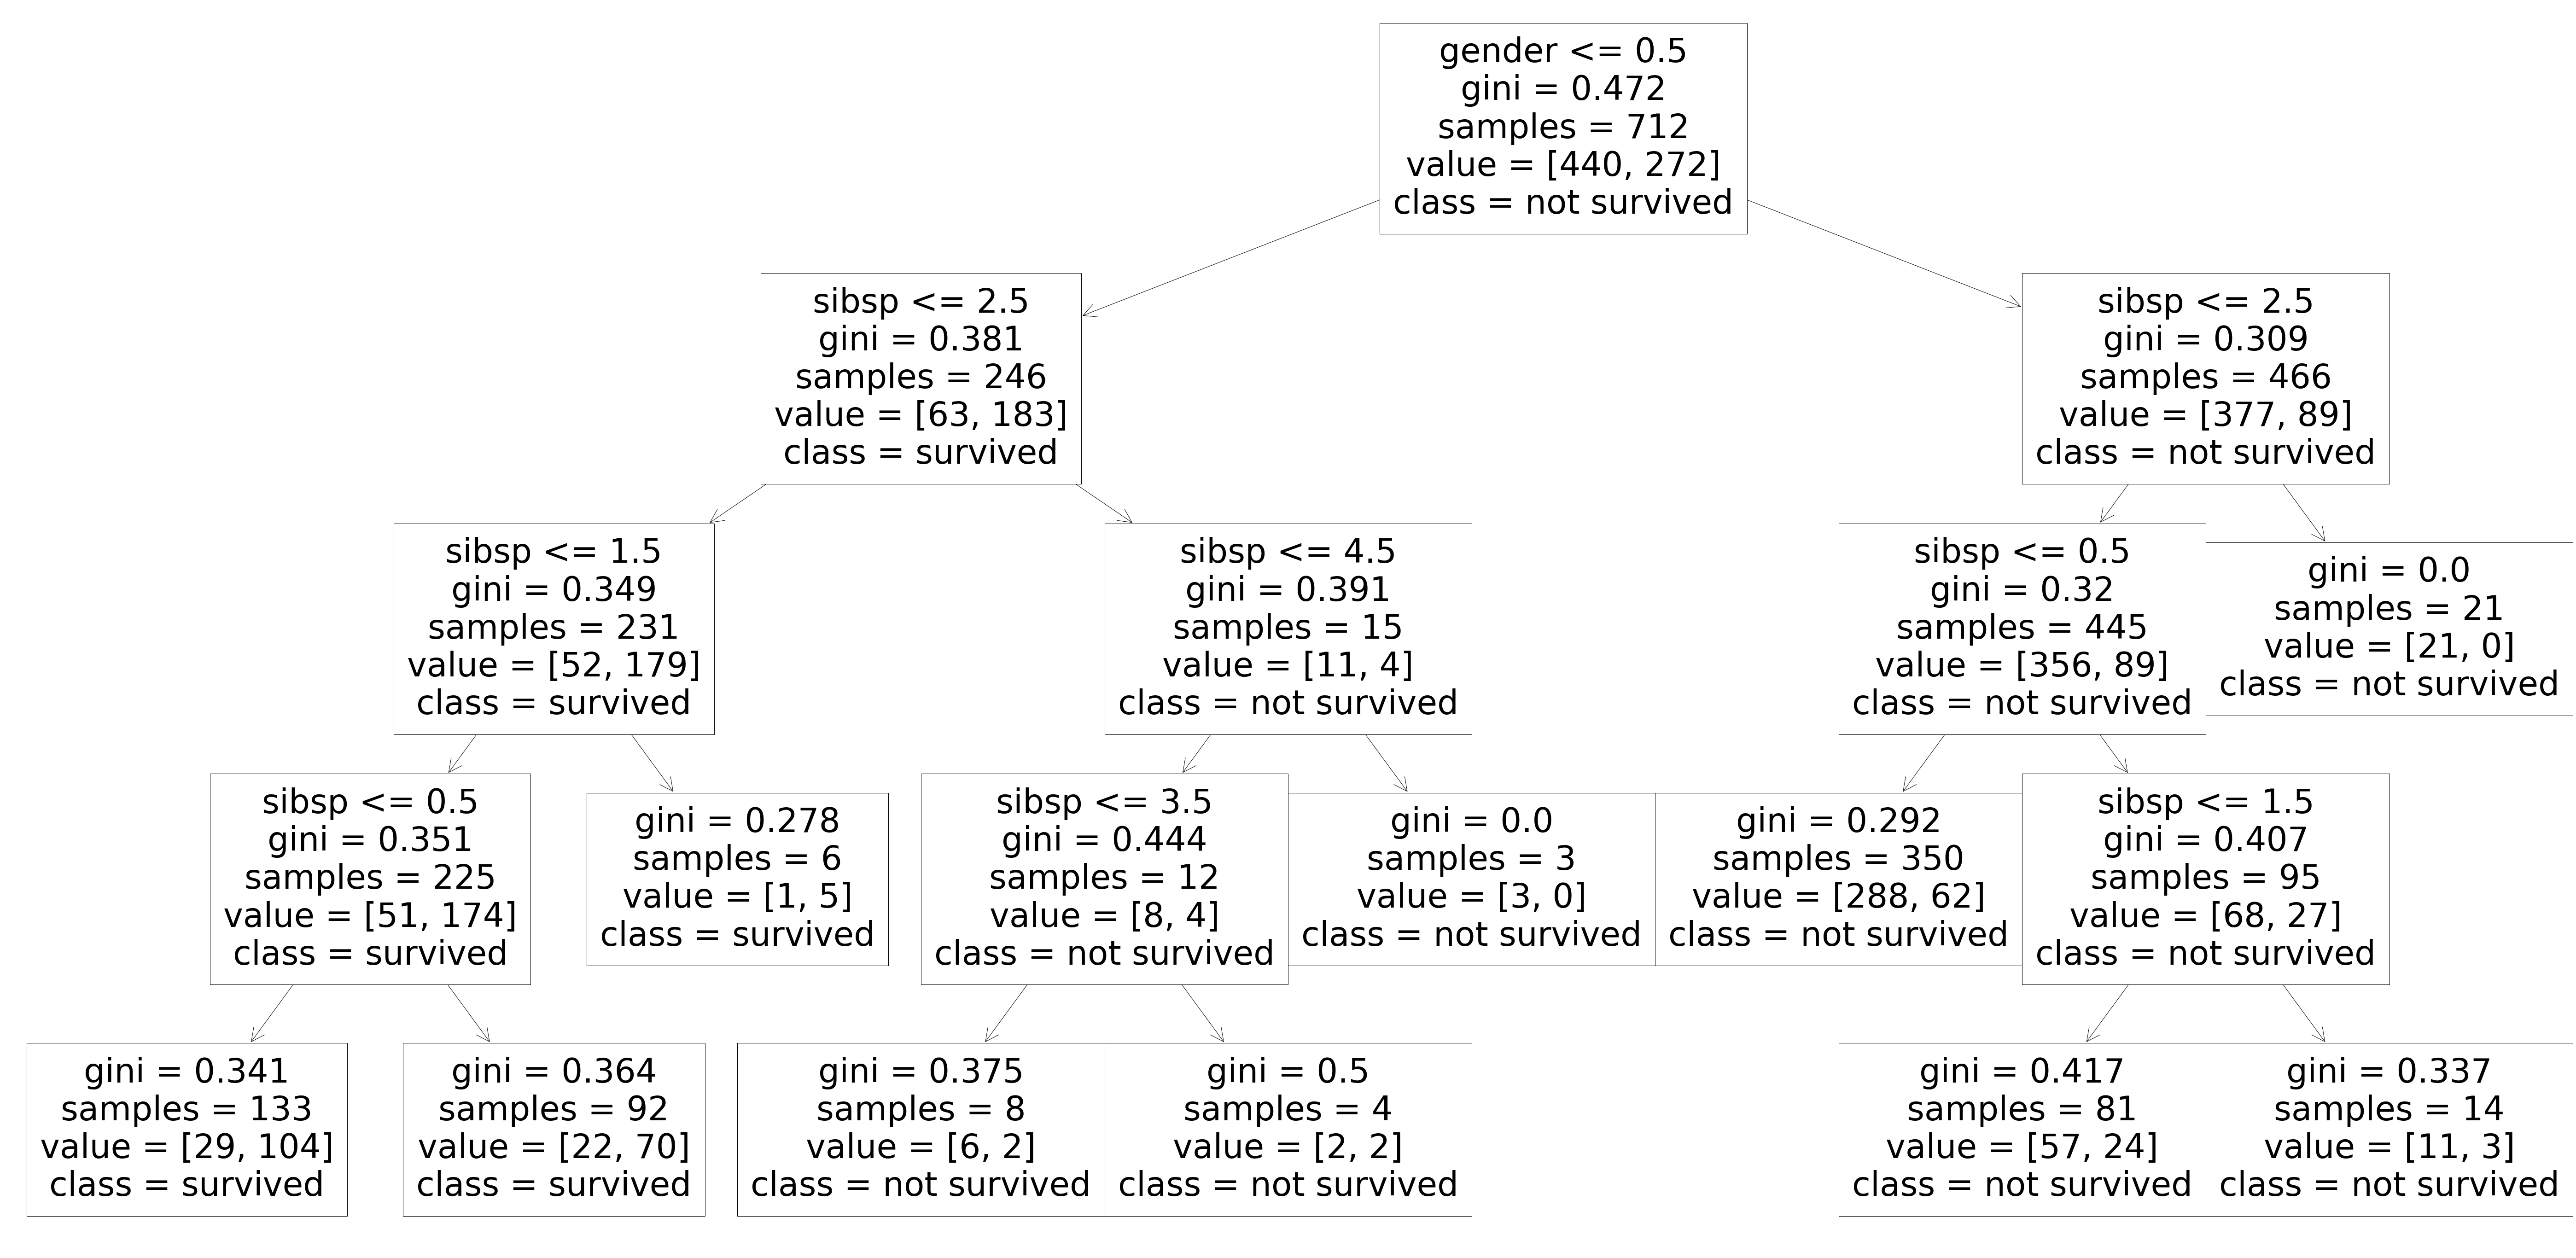

In [117]:

plt.figure(figsize=(100,50)) # needed, that we can see the figure properly
tree.plot_tree(clf, feature_names=['gender', 'sibsp'], class_names=['not survived', 'survived'])
plt.savefig("./treeSibSp")
plt.show()

## Further Reading
- [scikit-learn documentation](https://scikit-learn.org/stable/modules/classes.html#)

and see below:

[<img src="https://cloud.google.com/products/ai/ml-comic-1/assets/panel_01_2x.png" width=500>](https://cloud.google.com/products/ai/ml-comic-1/)